# Logistic Regression With IRIS data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
import os
import urllib.request

data_location = "iris.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/iris/iris_combined.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: iris.csv


In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

iris = pd.read_csv(data_location)
iris.sample(10)

,c1,c2,c3,c4,label
81,6.10,2.90,4.70,1.40,2
115,5.50,2.60,4.40,1.20,2
65,7.30,2.90,6.30,1.80,3
73,7.70,3.00,6.10,2.30,3
91,6.10,2.80,4.70,1.20,2
128,5.60,3.00,4.10,1.30,2
7,6.90,3.10,5.10,2.30,3
127,6.30,2.80,5.10,1.50,3
6,5.40,3.40,1.50,0.40,1
87,5.70,2.80,4.50,1.30,2


## Exploratory Data Analysis (EDA)

In [4]:
## TODO : 'describe' the dataset
iris.describe()

,c1,c2,c3,c4,label
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,2.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,1.00
25%,5.10,2.80,1.60,0.30,1.00
50%,5.80,3.00,4.35,1.30,2.00
75%,6.40,3.30,5.10,1.80,3.00
max,7.90,4.40,6.90,2.50,3.00


In [5]:
# TODO : how are our labels distributed
## Hint : 'value_counts'

iris['label'].value_counts()

3    50
2    50
1    50
Name: label, dtype: int64

In [6]:
iris['label'].value_counts(normalize=True)

3   0.33
2   0.33
1   0.33
Name: label, dtype: float64

## Shape Data

In [7]:
## extract x and y
## Hint : input columns : c1, c2, c3, c4
#  hint: y colunm is : 'label'

x = iris[['c1', 'c2', 'c3', 'c4']]
y = iris['label']

print (x)
print (y)

      c1   c2   c3   c4
0   6.40 2.80 5.60 2.20
1   5.00 2.30 3.30 1.00
2   4.90 2.50 4.50 1.70
3   4.90 3.10 1.50 0.10
4   5.70 3.80 1.70 0.30
..   ...  ...  ...  ...
145 6.10 3.00 4.60 1.40
146 5.20 4.10 1.50 0.10
147 6.70 3.10 4.70 1.50
148 6.70 3.30 5.70 2.50
149 6.40 2.90 4.30 1.30

[150 rows x 4 columns]
0      3
1      2
2      3
3      1
4      1
      ..
145    2
146    1
147    2
148    3
149    2
Name: label, Length: 150, dtype: int64


In [8]:
## Todo : print the 'shape' of X and y
## hint : shape
print ('x : ', x.shape)
print ('y : ', y.shape)

x :  (150, 4)
y :  (150,)


## Split train/test

In [9]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2)


print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (120, 4)
x_test : (30, 4)
y_train : (120,)
y_test : (30,)


## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e5)

# TODO : Fit the model
## Hint : first param : x_train,  
##        second_param : y_train

model = lr.fit(x_train, y_train)


In [11]:
print('coef : ', model.coef_)
print('intercept' , model.intercept_)

coef :  [[  4.12544506  10.17002668 -15.54187817  -7.14367633]
 [ -0.32348578  -3.38824444   3.43983136  -3.79503804]
 [ -3.80195928  -6.78178225  12.10204681  10.93871437]]
intercept [  2.22159647  16.72149695 -18.94309342]


## Model Evaluation

In [12]:
## TODO : predict on x_test
## hint : 'x_test'

y_pred = model.predict (x_test)
y_pred

array([2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 2, 2, 1, 3,
       2, 1, 1, 2, 3, 3, 3, 1])

In [13]:
train_accuracy = model.score(x_train,y_train)
print ("Train accuracy: ", train_accuracy)

Train accuracy:  0.9833333333333333


In [14]:
## TODO : calculate test_accuracy
## Hint : x_test,  y_test

test_accuracy = model.score(x_test, y_test)

print ("Test accuracy: ", test_accuracy)

Test accuracy:  0.9666666666666667


In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]])

[]

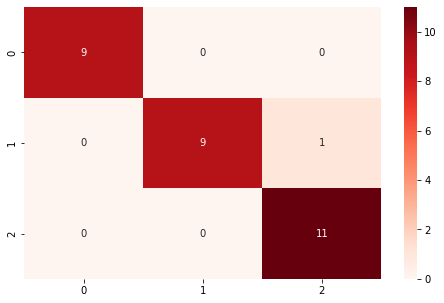

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()